<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Tutorial 5 - Machine Learning</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

### **1) Naïve Bayes**

Consider a traffic-monitoring agent trying to decide whether the stoplights at an intersection are working or not (W = w or ¬w). The agent observes two variables, the East-West light's color EW, which is either red or green, and the North-South light's color NS, which is also either red or green. When the lights are functioning, exactly one of the lights is green, while when the lights are broken, both are red (and flashing, but the agent cannot perceive this distinction). The agent has several observations as training data:

| NS | EW | W  |
|----|----|----|
| r  | g  | w  |
| g  | r  | w  |
| r  | r  | ¬w |
| g  | r  | w  |
| r  | g  | w  |
| r  | g  | w  |
| g  | r  | w  |

#### **Part (a): Model Parameters**

Assume the agent uses a Naïve Bayes classifier to make its prediction. What are the parameters of the model?

**Solution:**
The parameters of the Naïve Bayes model are:
- Pr(W)
- Pr(NS|W) 
- Pr(EW|W)

#### **Part (b): Maximum Likelihood Estimator (MLE)**

What is the Maximum Likelihood Estimator (MLE) for the parameters?

**Solution:**

**Prior probabilities:**
- Pr(W = w) = 6/7
- Pr(W = ¬w) = 1 - 6/7 = 1/7

**Conditional probabilities for NS:**
- Pr(NS = r|W = w) = 3/6 = 1/2
- Pr(NS = g|W = w) = 1 - 1/2 = 1/2
- Pr(NS = r|W = ¬w) = 1
- Pr(NS = g|W = ¬w) = 1 - 1 = 0

**Conditional probabilities for EW:**
- Pr(EW = r|W = w) = 3/6 = 1/2
- Pr(EW = g|W = w) = 1 - 1/2 = 1/2
- Pr(EW = r|W = ¬w) = 1
- Pr(EW = g|W = ¬w) = 1 - 1 = 0

#### **Part (c): Prediction for Both Lights Red**

Assume the agent observes that both lights are red. What is the probability that the lights are working according to the agent's model?

**Solution:**

We need to calculate Pr(W = w|NS = r, EW = r) using Bayes' theorem:

**For W = w:**
$$Pr(W = w|NS = r, EW = r) = α × Pr(NS = r|W = w) × Pr(EW = r|W = w) × Pr(W = w)$$
$$= α × \frac{1}{2} × \frac{1}{2} × \frac{6}{7} = α × \frac{3}{14}$$

**For W = ¬w:**
$$Pr(W = ¬w|NS = r, EW = r) = α × Pr(NS = r|W = ¬w) × Pr(EW = r|W = ¬w) × Pr(W = ¬w)$$
$$= α × 1 × 1 × \frac{1}{7} = α × \frac{1}{7}$$

**Normalization:**
$$α = \frac{1}{\frac{3}{14} + \frac{1}{7}} = \frac{1}{\frac{3}{14} + \frac{2}{14}} = \frac{14}{5}$$

**Final answer:**
$$Pr(W = w|NS = r, EW = r) = \frac{14}{5} × \frac{3}{14} = \frac{3}{5} = 0.6$$

---

### **2) Supervised Machine Learning**

Consider the following dataset consisting of 3 binary features and a binary class variable:

| Feature 1 | Feature 2 | Feature 3 | Class |
|-----------|-----------|-----------|-------|
| 1         | 0         | 0         | 0     |
| 1         | 0         | 1         | 1     |
| 1         | 1         | 1         | 1     |
| 1         | 1         | 1         | 1     |
| 0         | 1         | 1         | 0     |
| 0         | 0         | 1         | 0     |

#### **Part (a): Prior Probability**

Based on the dataset above, estimate the prior probability of Class 1.

**Solution:**
$$Pr(Class = 1) = \frac{3}{6} = 0.5$$

#### **Part (b): Initial Entropy**

What is the initial entropy of the class labels over all the data? Show the formula before plugging-in numbers.

**Solution:**

**Formula:**
$$H(Class) = -Pr(Class=1) \log_2 Pr(Class=1) - Pr(Class=0) \log_2 Pr(Class=0)$$

**Calculation:**
$$H(Class) = -0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 1$$

#### **Part (c): Entropy After Split on Feature 1**

If we were to split the data into 2 groups based on the value of Feature 1, what would be the entropy for each group?

**Solution:**

**For Feature1 = 1:** [3 Class=1, 1 Class=0]
$$H(Class|Feature1=1) = -\frac{3}{4}\log_2\left(\frac{3}{4}\right) - \frac{1}{4}\log_2\left(\frac{1}{4}\right) = 0.81$$

**For Feature1 = 0:** [0 Class=1, 2 Class=0]
$$H(Class|Feature1=0) = -1\log_2(1) - 0\log_2(0) = 0$$

#### **Part (d): Information Gain of Feature 1**

What is the Information Gain of Feature 1?

**Solution:**

$$IG(Feature1) = H(Class) - [Pr(F1 = 1)H(Class|F1 = 1) + Pr(F1 = 0)H(Class|F1 = 0)]$$
$$= 1 - \left[\frac{4}{6} × 0.81 + \frac{2}{6} × 0\right] = 1 - 0.54 = 0.46$$

#### **Part (e): Decision Tree**

You are told the Information Gain for Feature 2 and Feature 3 after splitting on Feature1 is 0.08 and 0.19 respectively. Draw a decision tree for this problem.

**Solution:**

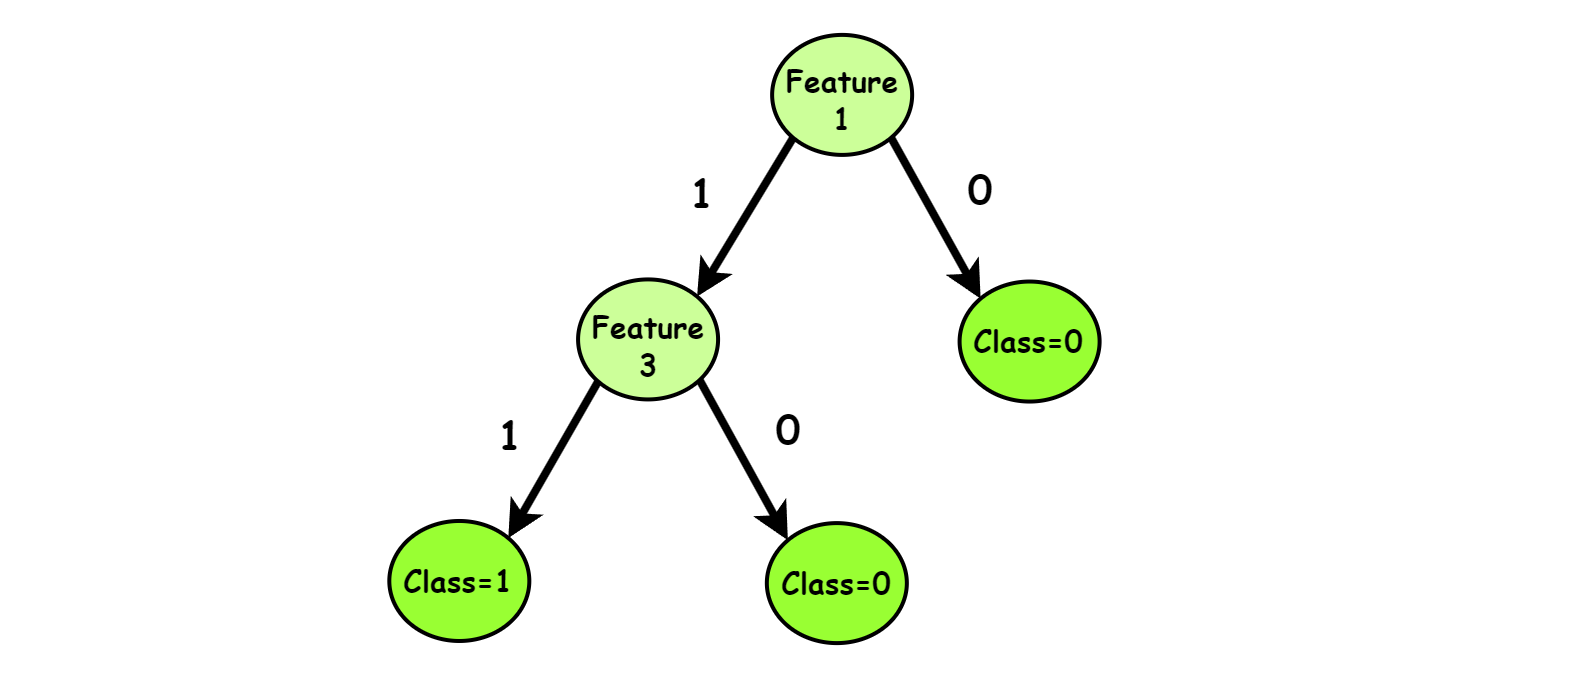

Since Feature 1 has the highest information gain (0.46), it's the root node. For the left branch (Feature1=1), Feature 3 has higher gain (0.19 > 0.08) than Feature 2, so it's chosen for the next split.

#### **Part (f): Naïve Bayes Network**

We will now build a Naïve Bayes model for predicting the class from these data. Draw the Bayesian Network that corresponds to the Naïve Bayes model.

**Solution:**

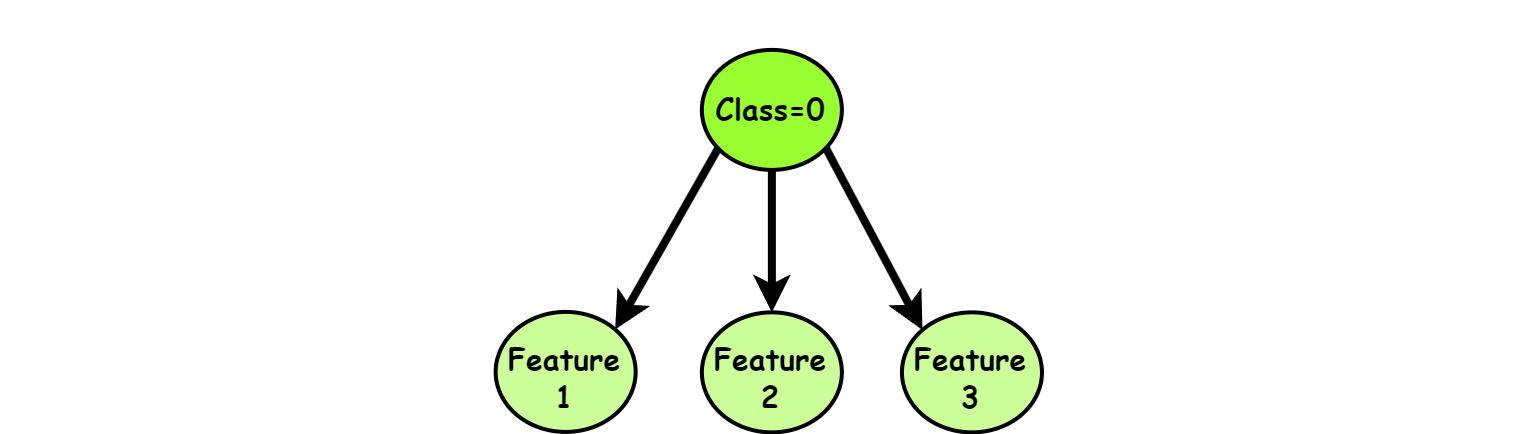

#### **Part (g): Conditional Probability Estimates**

From the data table, write down the conditional probability estimates required for the Naïve Bayes model.

**Solution:**

- Pr(Feature1 = 1|Class = 1) = 3/3 = 1
- Pr(Feature1 = 1|Class = 0) = 1/3
- Pr(Feature2 = 1|Class = 1) = 2/3
- Pr(Feature2 = 1|Class = 0) = 1/3
- Pr(Feature3 = 1|Class = 1) = 3/3 = 1
- Pr(Feature3 = 1|Class = 0) = 2/3

#### **Part (h): Naïve Bayes Prediction**

What class does the Naïve Bayes model predict for a new data item with values (1, 1, 1) for Features 1, 2 and 3 respectively? What is the probability of each class? How does the Naïve Bayes classification compare to the decision tree classification?

**Solution:**

**For Class = 1:**
$$Pr(C = 1|F1 = 1, F2 = 1, F3 = 1) = αPr(F1 = 1|C = 1)Pr(F2 = 1|C = 1)Pr(F3 = 1|C = 1)Pr(C = 1)$$
$$= α × 1 × \frac{2}{3} × 1 × \frac{1}{2} = \frac{1}{3} × α$$

**For Class = 0:**
$$Pr(C = 0|F1 = 1, F2 = 1, F3 = 1) = αPr(F1 = 1|C = 0)Pr(F2 = 1|C = 0)Pr(F3 = 1|C = 0)Pr(C = 0)$$
$$= α × \frac{1}{3} × \frac{1}{3} × \frac{2}{3} × \frac{1}{2} = \frac{1}{27} × α$$

**Normalization:**
$$α = \frac{1}{\frac{1}{3} + \frac{1}{27}} = \frac{1}{\frac{9+1}{27}} = \frac{27}{10} = 2.7$$

**Final probabilities:**
- Pr(C = 1|F1 = 1, F2 = 1, F3 = 1) = 2.7 × 1/3 = 0.9
- Pr(C = 0|F1 = 1, F2 = 1, F3 = 1) = 2.7 × 1/27 = 0.1

**Conclusion:** Naïve Bayes assigns Class 1 to case (1,1,1), which is the same as the decision tree prediction.


---

### **3) K-Nearest-Neighbour**

Assume we have the age, loan amount and pay result of some customers from the bank. We need to predict the pay result of a new loan applicant given only age and loan amount. The data are shown below:

| Age | Loan Amount (K) | Pay Status | Distance to new customer |
|-----|-----------------|------------|-------------------------|
| 20  | 20              | Paid       | √[(20-42)² + (20-140)²] = 122 |
| 25  | 45              | Paid       | √[(25-42)² + (45-140)²] = 96.51 |
| 22  | 95              | Default    | √[(22-42)² + (95-140)²] = 49.24 |
| 35  | 53              | Paid       | √[(35-42)² + (53-140)²] = 87.28 |
| 35  | 120             | **Paid**   | √[(35-42)² + (120-140)²] = **21.19** |
| 33  | 150             | **Default** | √[(33-42)² + (150-140)²] = **13.45** |
| 40  | 54              | Default    | √[(40-42)² + (54-140)²] = 86.02 |
| 45  | 75              | Paid       | √[(45-42)² + (75-140)²] = 65.07 |
| 52  | 20              | Paid       | √[(52-42)² + (20-140)²] = 120.42 |
| 49  | 220             | Default    | √[(49-42)² + (220-140)²] = 80.31 |
| 60  | 100             | **Default** | √[(60-42)² + (100-140)²] = **43.86** |

A new bank customer with age 42 comes in and applies for a loan AUD$140K, how would the 3-nearest-neighbour algorithm predict this customer? Paid or Default?

**Solution:**

The 3 nearest neighbours (shown in bold) are:
1. Distance 13.45 → Default
2. Distance 21.19 → Paid  
3. Distance 43.86 → Default

**Prediction:** 2 out of 3 nearest neighbours have "Default" status, so the algorithm will predict this new customer will **Default** on the loan.

---

### **4) K-Means Clustering Theory**

Consider the k-means clustering algorithm when answering the following questions.

#### **Part (a): Algorithm Steps**

What are the two steps performed at each iteration of the clustering algorithm?

**Solution:**
1. **Step 1:** Reassign data points to their closest cluster (centre)
2. **Step 2:** Recompute the centre (mean) of each cluster

#### **Part (b): Convergence**

Is the algorithm guaranteed to converge (stop) at some point? And if so, does it converge to a global optimum or a local optimum?

**Solution:**
Yes, convergence is guaranteed, but to a **local optimum**. Other techniques are required to achieve global optimum.

#### **Part (c): Choosing Number of Clusters**

Choosing the "right number" of clusters for k-means clustering can be difficult. One strategy would be to choose the number of clusters that minimises the sum of the (squared) distances between data points and their cluster centres. Would this be a good strategy? Why?

**Solution:**
No, it is not a good strategy, since the "optimal" number of clusters (i.e., the one that minimizes the sum of the distances to the cluster means) would always be n, the number of datapoints.

#### **Part (d): Data Preprocessing**

Before running a clustering algorithm it is important to preprocess your data. What preprocessing is most important and why?

**Solution:**
Must rescale your features/dimensions to have the same range, otherwise the distance measure will be controlled by the dimension with the largest scale.

---

### **5) K-Means Clustering Implementation**

Assume we have following data with two attributes, apply the K-means clustering algorithm where K=2 and initialized cluster centroid C1=(1.25, 1.25) and C2=(1.75, 4.75). You should use Euclidean distance to perform your calculations.

| Instance | D1  | D2  |
|----------|-----|-----|
| X1       | 1.0 | 1.5 |
| X2       | 1.0 | 4.5 |
| X3       | 2.0 | 1.5 |
| X4       | 2.0 | 3.5 |
| X5       | 3.0 | 2.5 |
| X6       | 5.0 | 6.0 |
| X7       | 4.0 | 5.5 |
| X8       | 6.0 | 1.5 |

**Solution:**

#### **Iteration 1:**

**Initial centroids:**
- C1 = (1.25, 1.25)
- C2 = (1.75, 4.75)

**Detailed distance calculations using Euclidean distance formula:**
$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

**For each data point:**

**X1 = (1.0, 1.5):**
- Distance to C1: $\sqrt{(1.0-1.25)^2 + (1.5-1.25)^2} = \sqrt{0.0625 + 0.0625} = \sqrt{0.125} = 0.354$
- Distance to C2: $\sqrt{(1.0-1.75)^2 + (1.5-4.75)^2} = \sqrt{0.5625 + 10.5625} = \sqrt{11.125} = 3.335$
- **Assigned to C1** (closer)

**X2 = (1.0, 4.5):**
- Distance to C1: $\sqrt{(1.0-1.25)^2 + (4.5-1.25)^2} = \sqrt{0.0625 + 10.5625} = \sqrt{10.625} = 3.260$
- Distance to C2: $\sqrt{(1.0-1.75)^2 + (4.5-4.75)^2} = \sqrt{0.5625 + 0.0625} = \sqrt{0.625} = 0.791$
- **Assigned to C2** (closer)

**X3 = (2.0, 1.5):**
- Distance to C1: $\sqrt{(2.0-1.25)^2 + (1.5-1.25)^2} = \sqrt{0.5625 + 0.0625} = \sqrt{0.625} = 0.791$
- Distance to C2: $\sqrt{(2.0-1.75)^2 + (1.5-4.75)^2} = \sqrt{0.0625 + 10.5625} = \sqrt{10.625} = 3.260$
- **Assigned to C1** (closer)

**X4 = (2.0, 3.5):**
- Distance to C1: $\sqrt{(2.0-1.25)^2 + (3.5-1.25)^2} = \sqrt{0.5625 + 5.0625} = \sqrt{5.625} = 2.372$
- Distance to C2: $\sqrt{(2.0-1.75)^2 + (3.5-4.75)^2} = \sqrt{0.0625 + 1.5625} = \sqrt{1.625} = 1.275$
- **Assigned to C2** (closer)

**X5 = (3.0, 2.5):**
- Distance to C1: $\sqrt{(3.0-1.25)^2 + (2.5-1.25)^2} = \sqrt{3.0625 + 1.5625} = \sqrt{4.625} = 2.151$
- Distance to C2: $\sqrt{(3.0-1.75)^2 + (2.5-4.75)^2} = \sqrt{1.5625 + 5.0625} = \sqrt{6.625} = 2.574$
- **Assigned to C1** (closer)

**X6 = (5.0, 6.0):**
- Distance to C1: $\sqrt{(5.0-1.25)^2 + (6.0-1.25)^2} = \sqrt{14.0625 + 22.5625} = \sqrt{36.625} = 6.052$
- Distance to C2: $\sqrt{(5.0-1.75)^2 + (6.0-4.75)^2} = \sqrt{10.5625 + 1.5625} = \sqrt{12.125} = 3.482$
- **Assigned to C2** (closer)

**X7 = (4.0, 5.5):**
- Distance to C1: $\sqrt{(4.0-1.25)^2 + (5.5-1.25)^2} = \sqrt{7.5625 + 18.0625} = \sqrt{25.625} = 5.062$
- Distance to C2: $\sqrt{(4.0-1.75)^2 + (5.5-4.75)^2} = \sqrt{5.0625 + 0.5625} = \sqrt{5.625} = 2.372$
- **Assigned to C2** (closer)

**X8 = (6.0, 1.5):**
- Distance to C1: $\sqrt{(6.0-1.25)^2 + (1.5-1.25)^2} = \sqrt{22.5625 + 0.0625} = \sqrt{22.625} = 4.757$
- Distance to C2: $\sqrt{(6.0-1.75)^2 + (1.5-4.75)^2} = \sqrt{18.0625 + 10.5625} = \sqrt{28.625} = 5.350$
- **Assigned to C1** (closer)

**Summary table:**

| Instance | D1 | D2 | Distance to C1 | Distance to C2 | Cluster |
|----------|----|----|----------------|----------------|---------|
| X1       | 1  | 1.5| 0.354          | 3.335          | C1      |
| X2       | 1  | 4.5| 3.260          | 0.791          | C2      |
| X3       | 2  | 1.5| 0.791          | 3.260          | C1      |
| X4       | 2  | 3.5| 2.372          | 1.275          | C2      |
| X5       | 3  | 2.5| 2.151          | 2.574          | C1      |
| X6       | 5  | 6.0| 6.052          | 3.482          | C2      |
| X7       | 4  | 5.5| 5.062          | 2.372          | C2      |
| X8       | 6  | 1.5| 4.757          | 5.350          | C1      |

**Cluster assignments:**
- C1: {X1, X3, X5, X8}
- C2: {X2, X4, X6, X7}

**Update centroids:**
- C1 = ((1+2+3+6)/4, (1.5+1.5+2.5+1.5)/4) = (3, 1.75)
- C2 = ((1+2+5+4)/4, (4.5+3.5+6.0+5.5)/4) = (3, 4.875)

#### **Iteration 2:**

**New centroids calculated from cluster assignments:**
- C1 = ((1+2+3+6)/4, (1.5+1.5+2.5+1.5)/4) = (3, 1.75)
- C2 = ((1+2+5+4)/4, (4.5+3.5+6.0+5.5)/4) = (3, 4.875)

**Detailed distance calculations for new centroids:**

**X1 = (1.0, 1.5):**
- Distance to C1: $\sqrt{(1.0-3)^2 + (1.5-1.75)^2} = \sqrt{4 + 0.0625} = \sqrt{4.0625} = 2.016$
- Distance to C2: $\sqrt{(1.0-3)^2 + (1.5-4.875)^2} = \sqrt{4 + 11.391} = \sqrt{15.391} = 3.923$
- **Assigned to C1** (closer)

**X2 = (1.0, 4.5):**
- Distance to C1: $\sqrt{(1.0-3)^2 + (4.5-1.75)^2} = \sqrt{4 + 7.563} = \sqrt{11.563} = 3.401$
- Distance to C2: $\sqrt{(1.0-3)^2 + (4.5-4.875)^2} = \sqrt{4 + 0.141} = \sqrt{4.141} = 2.035$
- **Assigned to C2** (closer)

**X3 = (2.0, 1.5):**
- Distance to C1: $\sqrt{(2.0-3)^2 + (1.5-1.75)^2} = \sqrt{1 + 0.0625} = \sqrt{1.0625} = 1.031$
- Distance to C2: $\sqrt{(2.0-3)^2 + (1.5-4.875)^2} = \sqrt{1 + 11.391} = \sqrt{12.391} = 3.521$
- **Assigned to C1** (closer)

**X4 = (2.0, 3.5):**
- Distance to C1: $\sqrt{(2.0-3)^2 + (3.5-1.75)^2} = \sqrt{1 + 3.063} = \sqrt{4.063} = 2.016$
- Distance to C2: $\sqrt{(2.0-3)^2 + (3.5-4.875)^2} = \sqrt{1 + 1.891} = \sqrt{2.891} = 1.700$
- **Assigned to C2** (closer)

**X5 = (3.0, 2.5):**
- Distance to C1: $\sqrt{(3.0-3)^2 + (2.5-1.75)^2} = \sqrt{0 + 0.563} = \sqrt{0.563} = 0.75$
- Distance to C2: $\sqrt{(3.0-3)^2 + (2.5-4.875)^2} = \sqrt{0 + 5.641} = \sqrt{5.641} = 2.375$
- **Assigned to C1** (closer)

**X6 = (5.0, 6.0):**
- Distance to C1: $\sqrt{(5.0-3)^2 + (6.0-1.75)^2} = \sqrt{4 + 18.063} = \sqrt{22.063} = 4.697$
- Distance to C2: $\sqrt{(5.0-3)^2 + (6.0-4.875)^2} = \sqrt{4 + 1.266} = \sqrt{5.266} = 2.295$
- **Assigned to C2** (closer)

**X7 = (4.0, 5.5):**
- Distance to C1: $\sqrt{(4.0-3)^2 + (5.5-1.75)^2} = \sqrt{1 + 14.063} = \sqrt{15.063} = 3.881$
- Distance to C2: $\sqrt{(4.0-3)^2 + (5.5-4.875)^2} = \sqrt{1 + 0.391} = \sqrt{1.391} = 1.179$
- **Assigned to C2** (closer)

**X8 = (6.0, 1.5):**
- Distance to C1: $\sqrt{(6.0-3)^2 + (1.5-1.75)^2} = \sqrt{9 + 0.0625} = \sqrt{9.0625} = 3.010$
- Distance to C2: $\sqrt{(6.0-3)^2 + (1.5-4.875)^2} = \sqrt{9 + 11.391} = \sqrt{20.391} = 4.516$
- **Assigned to C1** (closer)

**Summary table:**

| Instance | D1 | D2 | Distance to C1 | Distance to C2 | Cluster |
|----------|----|----|----------------|----------------|---------|
| X1       | 1  | 1.5| 2.016          | 3.923          | C1      |
| X2       | 1  | 4.5| 3.401          | 2.035          | C2      |
| X3       | 2  | 1.5| 1.031          | 3.521          | C1      |
| X4       | 2  | 3.5| 2.016          | 1.700          | C2      |
| X5       | 3  | 2.5| 0.75           | 2.375          | C1      |
| X6       | 5  | 6.0| 4.697          | 2.295          | C2      |
| X7       | 4  | 5.5| 3.881          | 1.179          | C2      |
| X8       | 6  | 1.5| 3.010          | 4.516          | C1      |

**Cluster assignments remain the same:**
- C1: {X1, X3, X5, X8}
- C2: {X2, X4, X6, X7}

Since the clusters are the same for iteration 1 and 2, the algorithm has converged and stops here.

**Final Result:**
- **Cluster 1:** {X1, X3, X5, X8} with centroid (3, 1.75)
- **Cluster 2:** {X2, X4, X6, X7} with centroid (3, 4.875)
